In [1]:
# Google Stock Price Prediction using LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [3]:
# -----------------------------
# Step 1: Load and Preprocess Data
# -----------------------------

data = pd.read_csv('goog1.csv')
close_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


In [4]:
# -----------------------------
# Step 2: Train-Test Split
# -----------------------------

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [5]:
# -----------------------------
# Step 3: Sequence Preparation Function
# -----------------------------

def create_sequences(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape for LSTM: (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))


In [6]:
# -----------------------------
# Step 4: LSTM Model Architecture
# -----------------------------

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.2092
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0409
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0298
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0242
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0242
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 554ms/step - loss: 0.0272
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0210
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.0261
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 0.0215
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0169
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - loss: 0.0278
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0213
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0230


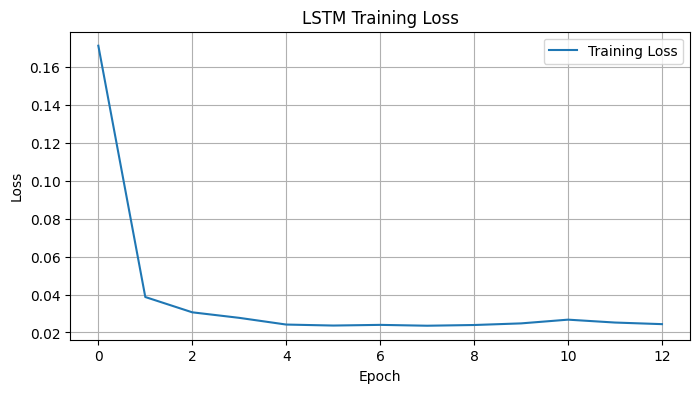

In [7]:
# -----------------------------
# Step 5: Train the Model
# -----------------------------

early_stop = EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=4, callbacks=[early_stop], verbose=1)

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# -----------------------------
# Step 6: Evaluate the Model
# -----------------------------

y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Evaluation Metrics:
MAE : 19.813781675223204
MSE : 395.39836983979836
RMSE: 19.884626469707655
R²  : -24.620501402785095


In [9]:
# -----------------------------
# Step 7: Forecast Next Day Price
# -----------------------------

last_6_days = close_prices[-6:]
last_6_scaled = scaler.transform(last_6_days)

X_pred = np.array([last_6_scaled])
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

pred_price = model.predict(X_pred)
pred_price_inv = scaler.inverse_transform(pred_price)
print("Predicted Close Price for Next Day:", pred_price_inv[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted Close Price for Next Day: 832.003


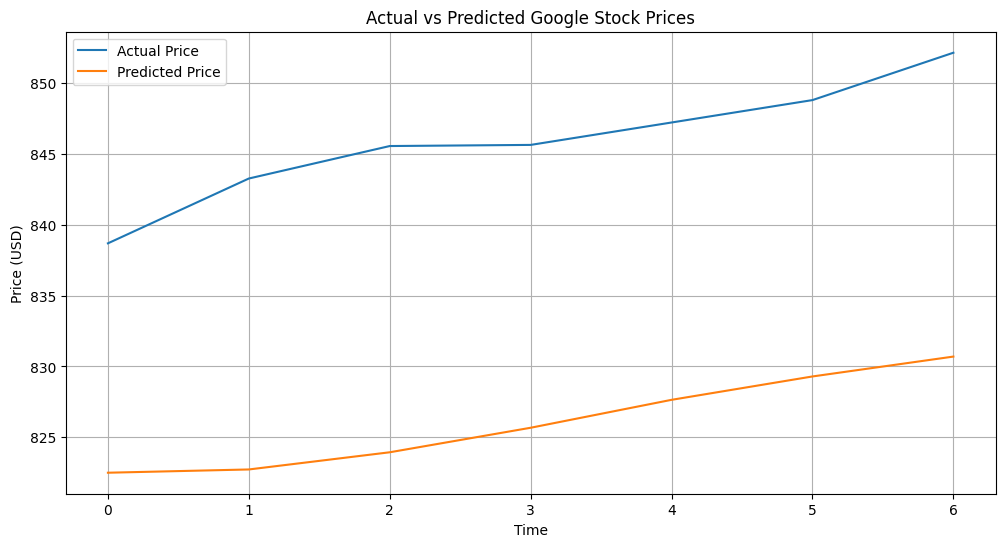

In [10]:
# -----------------------------
# Step 8: Plot Predictions vs Actual
# -----------------------------

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('Actual vs Predicted Google Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Save the trained model
# model.save("google_stock_rnn_model.h5")